# Email Spam Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("emails.csv.zip")
df.set_index("Email No.",inplace=True)

In [5]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
Email No.,,,,,,,,,,,,,,,,,,,,,
Email 1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Email 2,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
Email 3,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
Email 4,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
Email 5,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In the data set, there are 3000 features which are the frquency of common words in email.
<br />The last columns is the prediction whether the email is spam or not.
<br />0 - not spam
<br />1 - spam

In [6]:
#Split the whole dataset into feature matrix and prediction target
X=df[[feature for feature in list(df.columns) if feature!="Prediction"]]
y=df["Prediction"]

In [7]:
#check if there is missing value in feature matrix
count_is_missing=0
for feature in X.columns:
    if X[feature].isnull().sum()>0:
        count_is_missing+=1
print(count_is_missing)

0


In [8]:
#There is no missing data

## Exploratory data analysis and Feature Engineering

There are different kinds of words in the feature. I would like to split the words into 2 categories first.
<br /> single_word - word with only one character
<br /> multiple_word - word with more than one character
<br />It is more common to see word with more than one character

In [9]:
single_word=[]
multiple_word=[]
for feature in X.columns:
    if len(feature)==1:
        single_word.append(feature)
    else:
        multiple_word.append(feature)

The proportion of spam emails

In [10]:
sum(y)/len(y)

0.2900232018561485

There are about 30% of spam emails

Filter out the columns which have low standard deviation,ie standard deviation < 1.
<br />The words which seldomly appear are not significant.

In [11]:
count_single_word_ls=0
for feature in single_word:
    if X[feature].std()<1:
        count_single_word_ls+=1
print(count_single_word_ls)

0


All words will single character do not have low standard deviation.

In [12]:
count_multiple_word_hs=0
for feature in multiple_word:
    if X[feature].std()<1:
        count_multiple_word_hs+=1
print(count_multiple_word_hs)

2724


There are 2724 words which seldomly apperar. They will not be considered now.

In [13]:
multiple_word_hs=[]
for feature in multiple_word:
    if df[feature].std()>=1:
        multiple_word_hs.append(feature)

In [15]:
feature=single_word+multiple_word_hs

The words which are single character and mutiple character of frequency with high standard deviation will be used as the feature

## Modelling

Try diffrent models to build the classifier

### Deep Neural Network

Split the dataset into training set and testing set

In [16]:
#pick columns from X with selected feature
X_=X[feature]

In [17]:
#train test split
#stratify to make sure training set and testing set with similar distribution for emails
X_train, X_test, y_train, y_test = train_test_split(X_, y,test_size=0.2,stratify=y)

In [20]:
#run the deep nerual network
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[len(X_.columns)]))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy",optimizer = "sgd",metrics=["accuracy"])

In [21]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
130/130 [==============================] - 1s 2ms/step - loss: 2.5134 - accuracy: 0.6388 - val_loss: 0.5564 - val_accuracy: 0.7710
Epoch 2/50
130/130 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7937 - val_loss: 0.5704 - val_accuracy: 0.7749
Epoch 3/50
130/130 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8245 - val_loss: 0.4461 - val_accuracy: 0.8406
Epoch 4/50
130/130 [==============================] - 0s 1ms/step - loss: 0.3706 - accuracy: 0.8291 - val_loss: 0.3581 - val_accuracy: 0.8551
Epoch 5/50
130/130 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8328 - val_loss: 0.5029 - val_accuracy: 0.7961
Epoch 6/50
130/130 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8509 - val_loss: 0.3434 - val_accuracy: 0.8599
Epoch 7/50
130/130 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.8333 - val_loss: 0.5021 - val_accuracy: 0.8251
Epoch 

**The validation accuracy of deep neural network is 0.9188**

In [24]:
#run the deep nerual network with another merics
#area under roc curve
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[len(X_.columns)]))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy",optimizer = "sgd",metrics=[tf.keras.metrics.AUC()])

In [23]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
130/130 [==============================] - 1s 3ms/step - loss: 3.5159 - auc: 0.5894 - val_loss: 0.6457 - val_auc: 0.6286
Epoch 2/50
130/130 [==============================] - 0s 1ms/step - loss: 0.5205 - auc: 0.7983 - val_loss: 0.4251 - val_auc: 0.8879
Epoch 3/50
130/130 [==============================] - 0s 1ms/step - loss: 0.4400 - auc: 0.8588 - val_loss: 0.4935 - val_auc: 0.8675
Epoch 4/50
130/130 [==============================] - 0s 1ms/step - loss: 0.4256 - auc: 0.8804 - val_loss: 0.3823 - val_auc: 0.9035
Epoch 5/50
130/130 [==============================] - 0s 1ms/step - loss: 0.4086 - auc: 0.8794 - val_loss: 0.6842 - val_auc: 0.8232
Epoch 6/50
130/130 [==============================] - 0s 1ms/step - loss: 0.5194 - auc: 0.8331 - val_loss: 0.4289 - val_auc: 0.8940
Epoch 7/50
130/130 [==============================] - 0s 1ms/step - loss: 0.4042 - auc: 0.8759 - val_loss: 0.4865 - val_auc: 0.8730
Epoch 8/50
130/130 [==============================] - 0s 1ms/step - loss: 0.

**The validation metics of area under ROC curve of deep neural network is 0.9664**

### Gradient Boosting and PCA

Next, another model will be builded. PCA will be applied to reduce the dimension of matrix with selected feature. Gradient boosting will then be used to build the model 

In [25]:
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_auc_score

In [33]:
#Apply PCA to reduce dimension to preserve 99% of total variance

In [31]:
pca = PCA(n_components=0.99)

In [32]:
X_pca=pca.fit_transform(X_)
pca.n_components_

21

In [34]:
#21 dimensions are obtained by perserving 99% of total variance

In [35]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y,test_size=0.2,stratify=y)

Apply gradient boosting to the modified matrix

In [36]:
GB=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=2)
clf_GB=GB.fit(X_train_p,y_train_p)
clf_GB.score(X_test_p,y_test_p)

0.8541062801932368

Tune different hyperparameters for gradient boosting

pick the one with the highest accuracy score

In [51]:
best_score=0
for max_depth in range(1,6):
    for lr in [1,0.5,0.1,0.05]:
        GB=GradientBoostingClassifier(n_estimators=100, learning_rate=lr,max_depth=max_depth)
        clf_GB=GB.fit(X_train_p,y_train_p)
        score=clf_GB.score(X_test_p,y_test_p)
        if score>best_score:
            best_score=score
            model=clf_GB
        print(max_depth,lr,score)

1 1 0.8608695652173913
1 0.5 0.8541062801932368
1 0.1 0.8173913043478261
1 0.05 0.8048309178743961
2 1 0.8541062801932368
2 0.5 0.8676328502415459
2 0.1 0.8531400966183574
2 0.05 0.8318840579710145
3 1 0.8676328502415459
3 0.5 0.8666666666666667
3 0.1 0.8734299516908213
3 0.05 0.8579710144927536
4 1 0.8492753623188406
4 0.5 0.8734299516908213
4 0.1 0.8753623188405797
4 0.05 0.863768115942029
5 1 0.8695652173913043
5 0.5 0.8879227053140096
5 0.1 0.8763285024154589
5 0.05 0.8801932367149758


Hyperparameter of Gradient boost with the best performace

In [52]:
model

GradientBoostingClassifier(learning_rate=0.5, max_depth=5)

Evaluate the model with different metrics

In [53]:
print("The accuracy score is {}".format(model.score(X_test_p,y_test_p)))

The accuracy score is 0.8879227053140096


In [54]:
print("The f1 score is {}".format(f1_score(y_test_p,model.predict(X_test_p))))

The f1 score is 0.795053003533569


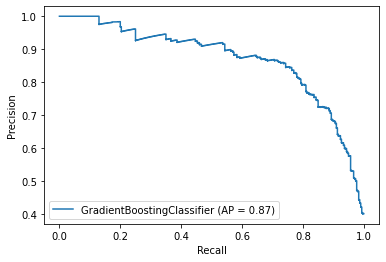

In [55]:
plot_precision_recall_curve(model, X_test_p, y_test_p)

In [56]:
print("The area under ROC curve is {}".format(roc_auc_score(y_test_p,model.predict(X_test_p))))

The area under ROC curve is 0.8471088435374149


The model of gradient boosting with PCA perform well according to different metrics.